In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_sharing_eval_df = pd.read_csv("data/full_sharing_eval_logs.csv")
full_sharing_train_df = pd.read_csv("data/full_sharing_train_logs.csv")
shared_encoder_eval_df = pd.read_csv("data/shared_encoder_eval_logs.csv")
shared_encoder_train_df = pd.read_csv("data/shared_encoder_train_logs.csv")
independent_eval_df = pd.read_csv("data/independent_eval_logs.csv")
independent_train_df = pd.read_csv("data/independent_train_logs.csv")

In [3]:
full_sharing_eval_df.head()

,iteration,eval_num_trials,eval_total_rewards,eval_average_rewards,eval_win_rate,eval_average_iters,eval_average_moves
0,0,30,169.767,5.658900,0.000000,150.000000,907.200000
1,1,30,285.906,9.530200,0.133333,144.166667,861.566667
2,2,30,405.399,13.513300,0.266667,134.300000,804.766667
3,3,30,420.676,14.022533,0.333333,127.066667,764.533333
4,4,30,533.449,17.781633,0.566667,110.266667,661.700000


In [4]:
full_sharing_train_df.head()

,iteration,env_steps,episode_reward_mean,episode_reward_max,episode_reward_min,episode_len_mean,policy_0_reward_mean,policy_1_reward_mean,policy_2_reward_mean,policy_3_reward_mean,policy_4_reward_mean,policy_5_reward_mean
0,0,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8000,50.962000,50.962,50.962,2051.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12000,87.457667,174.817,36.594,2393.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,3,16000,94.075000,307.763,21.788,1732.444444,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20000,81.574429,307.763,21.788,1402.857143,NaN,NaN,NaN,NaN,NaN,NaN


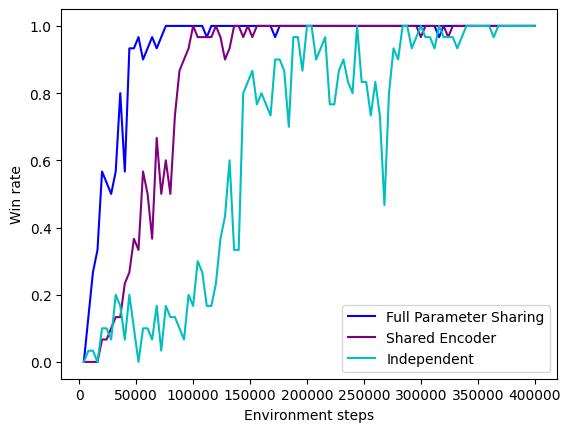

In [5]:
plt.figure()
plt.plot(full_sharing_train_df["env_steps"], full_sharing_eval_df["eval_win_rate"], label="Full Parameter Sharing", c="b")
plt.plot(shared_encoder_train_df["env_steps"], shared_encoder_eval_df["eval_win_rate"], label="Shared Encoder", c="purple")
plt.plot(independent_train_df["env_steps"], independent_eval_df["eval_win_rate"], label="Independent", c="c")
plt.legend(loc="best")
plt.xlabel("Environment steps")
plt.ylabel("Win rate")
plt.savefig("plots/winrate.png")

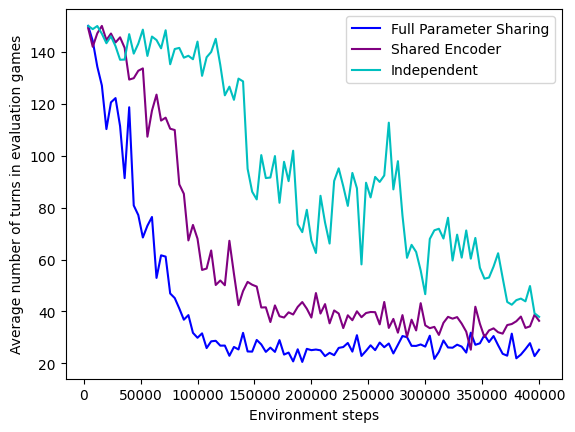

In [6]:
plt.figure()
plt.plot(full_sharing_train_df["env_steps"], full_sharing_eval_df["eval_average_iters"], label="Full Parameter Sharing", c="b")
plt.plot(shared_encoder_train_df["env_steps"], shared_encoder_eval_df["eval_average_iters"], label="Shared Encoder", c="purple")
plt.plot(independent_train_df["env_steps"], independent_eval_df["eval_average_iters"], label="Independent", c="c")
plt.legend(loc="best")
plt.xlabel("Environment steps")
plt.ylabel("Average number of turns in evaluation games")
plt.savefig("plots/game_length.png")

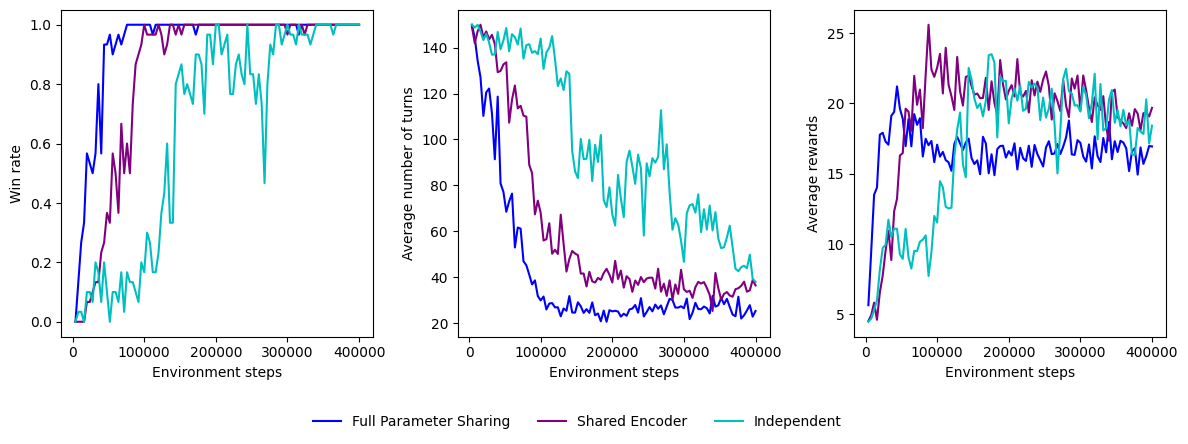

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(full_sharing_train_df["env_steps"], full_sharing_eval_df["eval_win_rate"], label="Full Parameter Sharing", c="b")
ax[0].plot(shared_encoder_train_df["env_steps"], shared_encoder_eval_df["eval_win_rate"], label="Shared Encoder", c="purple")
ax[0].plot(independent_train_df["env_steps"], independent_eval_df["eval_win_rate"], label="Independent", c="c")
ax[0].set_xlabel("Environment steps")
ax[0].set_ylabel("Win rate")
ax[0].set_xticks([100000 * i for i in range(5)])

ax[1].plot(full_sharing_train_df["env_steps"], full_sharing_eval_df["eval_average_iters"], label="Full Parameter Sharing", c="b")
ax[1].plot(shared_encoder_train_df["env_steps"], shared_encoder_eval_df["eval_average_iters"], label="Shared Encoder", c="purple")
ax[1].plot(independent_train_df["env_steps"], independent_eval_df["eval_average_iters"], label="Independent", c="c")
ax[1].set_xlabel("Environment steps")
ax[1].set_ylabel("Average number of turns")
ax[1].set_xticks([100000 * i for i in range(5)])

ax[2].plot(full_sharing_train_df["env_steps"], full_sharing_eval_df["eval_average_rewards"], label="Full Parameter Sharing", c="b")
ax[2].plot(shared_encoder_train_df["env_steps"], shared_encoder_eval_df["eval_average_rewards"], label="Shared Encoder", c="purple")
ax[2].plot(independent_train_df["env_steps"], independent_eval_df["eval_average_rewards"], label="Independent", c="c")
ax[2].set_xlabel("Environment steps")
ax[2].set_ylabel("Average rewards")
ax[2].set_xticks([100000 * i for i in range(5)])
plt.tight_layout()
plt.legend(bbox_to_anchor=(0, -0.2), ncol=3, frameon=False)

plt.savefig("plots/win_rate_game_length.png")

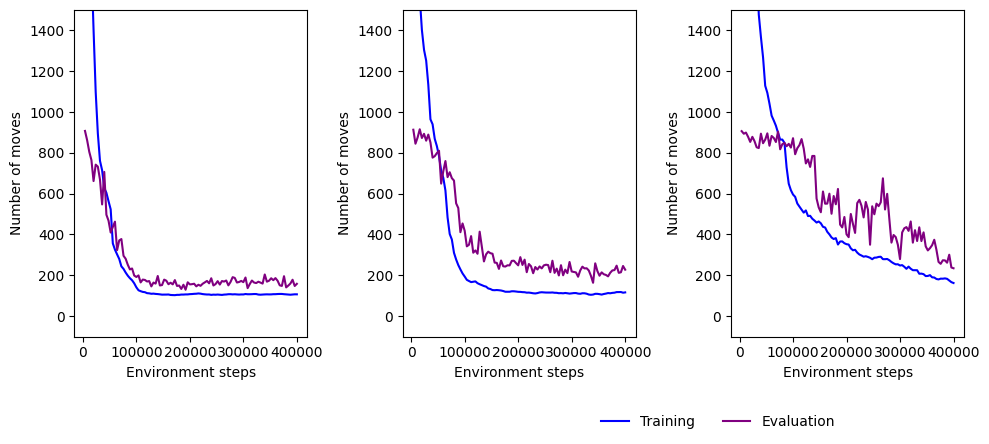

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].plot(full_sharing_train_df["env_steps"], full_sharing_train_df["episode_len_mean"], label="Training", c="b")
ax[0].plot(full_sharing_train_df["env_steps"], full_sharing_eval_df["eval_average_moves"], label="Evaluation", c="purple")
ax[0].set_xlabel("Environment steps")
ax[0].set_ylabel("Number of moves")
ax[0].set_xticks([100000 * i for i in range(5)])
ax[0].set_ylim(-100, 1500)

ax[1].plot(shared_encoder_train_df["env_steps"], shared_encoder_train_df["episode_len_mean"], label="Training", c="b")
ax[1].plot(shared_encoder_train_df["env_steps"], shared_encoder_eval_df["eval_average_moves"], label="Evaluation", c="purple")
ax[1].set_xlabel("Environment steps")
ax[1].set_ylabel("Number of moves")
ax[1].set_xticks([100000 * i for i in range(5)])
ax[1].set_ylim(-100, 1500)

ax[2].plot(independent_train_df["env_steps"], independent_train_df["episode_len_mean"], label="Training", c="b")
ax[2].plot(independent_train_df["env_steps"], independent_eval_df["eval_average_moves"], label="Evaluation", c="purple")
ax[2].set_xlabel("Environment steps")
ax[2].set_ylabel("Number of moves")
ax[2].set_xticks([100000 * i for i in range(5)])
ax[2].set_ylim(-100, 1500)

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

plt.savefig("plots/win_rate_game_length.png")